# AutoEncoder 연습

<img src="./img/autoencoder_arch.png" width="500">

## 필요한 모듈 import
* tensorflow (신경망 구성, 변수 설정, 역전파, gradient descent etc)
* numpy (텐서 연산)
* matplotlib (결과 그래프 출력)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## MNIST 데이터세트 로딩

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## 하이퍼 파라메터 설정
* hyer parameter는 사용자가 정의하는 변수들 
* learnable parameter는 학습을 통해 업데이트되는 변수들

In [3]:
# Training Parameters
learning_rate = 0.001
num_steps = 20000
batch_size = 64

# display_step 마다 Loss 출력
display_step = 1000

## 러너블 파라메터 설정 (learnable parameter = network parameter)
* 784 (input) - 256 (hidden) - 128 (latent) - 256 (hidden) - 784 (output)

In [4]:
# Network Parameters (learnable parameters)
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (28x28 = 784 dimension image size)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

Instructions for updating:
Colocations handled automatically by placer.


## Encoder 부분 구축
<img src="./img/encoder.png" width="500">

In [5]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

## Decoder 부분 구축
<img src="./img/decoder.png" width="500">

In [6]:
# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

## Loss 함수 정의 및 학습
* y_pred = 예측값
* y_true = 레이블
* loss = MSE (y_true - y_pred)
* train := optimizer(loss)

In [9]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op

# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Start Training
# Start a new TF session
sess = tf.Session()

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))


Step 1: Minibatch Loss: 0.431509
Step 1000: Minibatch Loss: 0.168812
Step 2000: Minibatch Loss: 0.161299
Step 3000: Minibatch Loss: 0.150654
Step 4000: Minibatch Loss: 0.147788
Step 5000: Minibatch Loss: 0.144453
Step 6000: Minibatch Loss: 0.139172
Step 7000: Minibatch Loss: 0.137264
Step 8000: Minibatch Loss: 0.134592
Step 9000: Minibatch Loss: 0.131697
Step 10000: Minibatch Loss: 0.129126
Step 11000: Minibatch Loss: 0.128406
Step 12000: Minibatch Loss: 0.127228
Step 13000: Minibatch Loss: 0.122832
Step 14000: Minibatch Loss: 0.120218
Step 15000: Minibatch Loss: 0.120371
Step 16000: Minibatch Loss: 0.116758
Step 17000: Minibatch Loss: 0.114372
Step 18000: Minibatch Loss: 0.114318
Step 19000: Minibatch Loss: 0.116929
Step 20000: Minibatch Loss: 0.113903


## 임의의 MINST 16개를 추출한 후 AutoEncoder 테스트 

Original Images


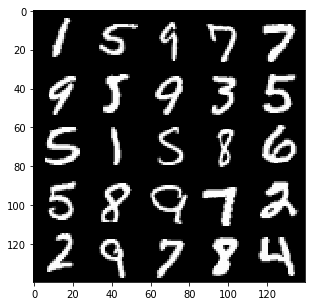

Reconstructed Images


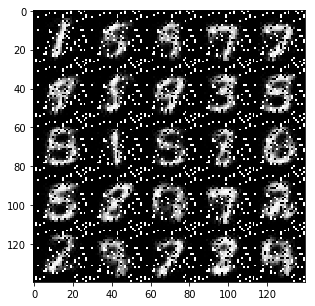

In [8]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.

n = 5
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
        
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
        
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})

    # Display original images
    for j in range(n):
        # Draw the original digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
       
    # Display reconstructed images
    for j in range(n):
        
        # Draw the reconstructed digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()